# Assignments: Cleaning Data

## 1. Data in Python Request

* Read in data from the Excel spreadsheet (Alarm Survey Data.xlsx) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [1]:
import pandas as pd
import numpy as np

In [2]:
Alarm_Survey_df = pd.read_excel(io = '../Data/Alarm Survey Data.xlsx' , sheet_name=0)
Alarm_Survey_df

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5 stars
6429,6363,31,1.0,light,4.0,0,4 stars
6430,6364,26,0.0,lightly active,5.0,0,3 stars
6431,6365,27,1.0,active,5.0,0,3 stars


In [3]:
Alarm_Survey_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   float64
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6082 non-null   float64
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.1 MB


In [4]:
Alarm_Survey_df.describe(include='all').loc[['min','max'] , :]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
min,1.0,13.0,0.0,NaN,1.0,0.0,NaN
max,6366.0,47.0,5.5,NaN,5.0,19.0,NaN


## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

## MIssing Value 1:

In [5]:
Alarm_Survey_df['sleep_quality'].isna().sum()

351

In [6]:
Alarm_Survey_df['sleep_quality'].value_counts(dropna=False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
NaN     351
1.0     103
Name: count, dtype: int64

In [7]:
Alarm_Survey_df[Alarm_Survey_df.sleep_quality.isna()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
10,11,28,2.0,light_activity,NaN,3,4 stars
18,19,38,2.0,lightly active,NaN,1,5 stars
23,24,24,2.0,very active,NaN,1,5 stars
26,27,25,2.0,lightly active,NaN,1,2 stars
28,29,29,2.0,lightly active,NaN,1,2 stars
...,...,...,...,...,...,...,...
6310,6311,30,2.0,very active,NaN,0,3 stars
6319,6320,44,2.0,lightly active,NaN,0,3 stars
6375,6309,32,3.0,light,NaN,0,3 stars
6377,6311,30,2.0,very active,NaN,0,3 stars


In [8]:
Alarm_Survey_df[['sleep_quality']]

,sleep_quality
0,3.0
1,3.0
2,4.0
3,4.0
4,1.0
...,...
6428,5.0
6429,4.0
6430,5.0
6431,5.0


In [9]:
Alarm_Survey_df[Alarm_Survey_df.isna().any(axis = 1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
10,11,28,2.0,light_activity,NaN,3,4 stars
18,19,38,2.0,lightly active,NaN,1,5 stars
23,24,24,2.0,very active,NaN,1,5 stars
26,27,25,2.0,lightly active,NaN,1,2 stars
28,29,29,2.0,lightly active,NaN,1,2 stars
...,...,...,...,...,...,...,...
6310,6311,30,2.0,very active,NaN,0,3 stars
6319,6320,44,2.0,lightly active,NaN,0,3 stars
6375,6309,32,3.0,light,NaN,0,3 stars
6377,6311,30,2.0,very active,NaN,0,3 stars


In [10]:
Alarm_Survey_df[Alarm_Survey_df.sleep_quality.notna()].sleep_quality.value_counts()

sleep_quality
5.0    2721
4.0    2261
3.0     997
1.0     103
Name: count, dtype: int64

In [11]:
Alarm_Survey_df.loc[Alarm_Survey_df['sleep_quality'].isnull(), : ]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
10,11,28,2.0,light_activity,NaN,3,4 stars
18,19,38,2.0,lightly active,NaN,1,5 stars
23,24,24,2.0,very active,NaN,1,5 stars
26,27,25,2.0,lightly active,NaN,1,2 stars
28,29,29,2.0,lightly active,NaN,1,2 stars
...,...,...,...,...,...,...,...
6310,6311,30,2.0,very active,NaN,0,3 stars
6319,6320,44,2.0,lightly active,NaN,0,3 stars
6375,6309,32,3.0,light,NaN,0,3 stars
6377,6311,30,2.0,very active,NaN,0,3 stars


In [12]:
Alarm_Survey_df.sleep_quality.isna().sum()

351

In [13]:
Alarm_Survey_df[Alarm_Survey_df['sleep_quality'] == 5.0]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
11,12,28,2.0,active,5.0,2,3 stars
13,14,27,0.0,lightly active,5.0,2,3 stars
20,21,19,0.0,lightly active,5.0,5,3 stars
25,26,23,0.0,active,5.0,4,4 stars
27,28,42,1.0,active,5.0,1,2 stars
...,...,...,...,...,...,...,...
6424,6358,30,4.0,lightly active,5.0,0,3 stars
6427,6361,19,0.0,lightly active,5.0,0,3 stars
6428,6362,27,2.0,active,5.0,0,5 stars
6430,6364,26,0.0,lightly active,5.0,0,3 stars


In [14]:
Alarm_Survey_df.sleep_quality.value_counts(dropna=False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
NaN     351
1.0     103
Name: count, dtype: int64

In [15]:
Alarm_Survey_df[Alarm_Survey_df.sleep_quality.isna()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
10,11,28,2.0,light_activity,NaN,3,4 stars
18,19,38,2.0,lightly active,NaN,1,5 stars
23,24,24,2.0,very active,NaN,1,5 stars
26,27,25,2.0,lightly active,NaN,1,2 stars
28,29,29,2.0,lightly active,NaN,1,2 stars
...,...,...,...,...,...,...,...
6310,6311,30,2.0,very active,NaN,0,3 stars
6319,6320,44,2.0,lightly active,NaN,0,3 stars
6375,6309,32,3.0,light,NaN,0,3 stars
6377,6311,30,2.0,very active,NaN,0,3 stars


In [16]:
Alarm_Survey_df.sleep_quality = np.where(Alarm_Survey_df.sleep_quality.isnull() , 2 , Alarm_Survey_df.sleep_quality )

In [17]:
Alarm_Survey_df.sleep_quality.value_counts(dropna = False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
2.0     351
1.0     103
Name: count, dtype: int64

In [18]:
fill_value = Alarm_Survey_df.sleep_quality.mean()
Alarm_Survey_df['sleep_quality'].fillna(value = fill_value , inplace= True)

In [19]:
Alarm_Survey_df.alarm_rating = Alarm_Survey_df.alarm_rating.astype('str').str.replace("stars","").astype('int8')
Alarm_Survey_df.activity_level  = Alarm_Survey_df.activity_level.astype('category')
Alarm_Survey_df.number_of_children = Alarm_Survey_df.number_of_children.astype('int8')

In [20]:
Alarm_Survey_df.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   survey_id           6433 non-null   int64   
 1   age                 6433 non-null   int64   
 2   number_of_children  6433 non-null   int8    
 3   activity_level      6433 non-null   category
 4   sleep_quality       6433 non-null   float64 
 5   number_of_snoozes   6433 non-null   int64   
 6   alarm_rating        6433 non-null   int8    
dtypes: category(1), float64(1), int64(3), int8(2)
memory usage: 220.5 KB


## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [21]:
for col in Alarm_Survey_df.columns:
    print(f"{col} : {Alarm_Survey_df[col].unique()}")

survey_id : [   1    2    3 ... 6364 6365 6366]
age : [34 31 18 42 30 25 41 36 27 29 28 19 39 26 38 40 44 24 23 32 37 45 43 22
 35 33 21 17 46 20 47 13 14 16 15]
number_of_children : [3 0 4 1 5 2]
activity_level : ['active', 'light', 'light_activity', 'lightly active', 'very active']
Categories (5, object): ['active', 'light', 'light_activity', 'lightly active', 'very active']
sleep_quality : [3. 4. 1. 2. 5.]
number_of_snoozes : [ 1  3  4  2  5  8 19  6  7  0]
alarm_rating : [5 3 1 4 2]


In [22]:
for col in Alarm_Survey_df.columns:
    print( f"{col} : {Alarm_Survey_df[col].sort_values(ascending = False).value_counts(dropna=False)}"
          , end = '\n' + '*'*40 + '\n')

survey_id : survey_id
6366    2
6323    2
6317    2
6318    2
6319    2
       ..
4204    1
4205    1
4206    1
4207    1
1       1
Name: count, Length: 6366, dtype: int64
****************************************
age : age
27    422
32    381
23    373
25    361
22    351
26    342
24    330
31    273
28    272
30    267
29    262
37    242
19    203
21    191
18    185
36    165
17    159
20    157
34    156
38    148
35    147
33    136
39    136
40    136
41    122
42    120
44     76
45     75
43     67
46     65
47     64
16     13
13     13
15     12
14     11
Name: count, dtype: int64
****************************************
number_of_children : number_of_children
0    2440
2    1498
1    1172
3     788
4     331
5     204
Name: count, dtype: int64
****************************************
activity_level : activity_level
active            2450
lightly active    2289
light_activity     691
very active        669
light              334
Name: count, dtype: int64
********************

In [23]:
Alarm_Survey_df.activity_level.unique()

['active', 'light', 'light_activity', 'lightly active', 'very active']
Categories (5, object): ['active', 'light', 'light_activity', 'lightly active', 'very active']

In [24]:
Alarm_Survey_df.activity_level = (np.
                                  where((Alarm_Survey_df.activity_level == 'light_activity') |
                                          (Alarm_Survey_df.activity_level == 'lightly active')
                                          , 'light' , 
                                        Alarm_Survey_df.activity_level))

In [25]:
# Alarm_Survey_df.activity_level = (np.where(Alarm_Survey_df.
#                                            activity_level.
#                                            isin(['light_activity', 'lightly active']) ,
#                                            'Active'
#                                           ))

In [26]:
Alarm_Survey_df[Alarm_Survey_df.any(axis = 1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,active,3.0,1,5
1,2,31,3,light,3.0,3,3
2,3,18,0,light,4.0,1,1
3,4,42,4,active,4.0,1,4
4,5,30,1,light,1.0,4,3
...,...,...,...,...,...,...,...
6428,6362,27,2,active,5.0,0,5
6429,6363,31,1,light,4.0,0,4
6430,6364,26,0,light,5.0,0,3
6431,6365,27,1,active,5.0,0,3


In [27]:
# Alarm_Survey_df.activity_level = (Alarm_Survey_df.
#                                   activity_level.map(
#                                       {'active' : 'Active' , 
#                                        'light_activity' : 'Light',
#                                        'lightly active' : 'light'                                      
#                                   }
#                                   )
#                                  )

In [28]:
Alarm_Survey_df.activity_level.value_counts()

activity_level
light          3314
active         2450
very active     669
Name: count, dtype: int64

In [29]:
Alarm_Survey_df.activity_level = Alarm_Survey_df.activity_level.str.capitalize()
Alarm_Survey_df.activity_level

0       Active
1        Light
2        Light
3       Active
4        Light
         ...  
6428    Active
6429     Light
6430     Light
6431    Active
6432     Light
Name: activity_level, Length: 6433, dtype: object

In [30]:
Alarm_Survey_df.isna().sum()

survey_id             0
age                   0
number_of_children    0
activity_level        0
sleep_quality         0
number_of_snoozes     0
alarm_rating          0
dtype: int64

In [31]:
Alarm_Survey_df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,Active,3.0,1,5
1,2,31,3,Light,3.0,3,3
2,3,18,0,Light,4.0,1,1
3,4,42,4,Active,4.0,1,4
4,5,30,1,Light,1.0,4,3


In [32]:
Alarm_Survey_df.sleep_quality = Alarm_Survey_df.sleep_quality.astype('int8')

In [33]:
Alarm_Survey_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   survey_id           6433 non-null   int64 
 1   age                 6433 non-null   int64 
 2   number_of_children  6433 non-null   int8  
 3   activity_level      6433 non-null   object
 4   sleep_quality       6433 non-null   int8  
 5   number_of_snoozes   6433 non-null   int64 
 6   alarm_rating        6433 non-null   int8  
dtypes: int64(3), int8(3), object(1)
memory usage: 565.6 KB


In [34]:
Alarm_Survey_df.isnull().sum()

survey_id             0
age                   0
number_of_children    0
activity_level        0
sleep_quality         0
number_of_snoozes     0
alarm_rating          0
dtype: int64

In [35]:
Alarm_Survey_df.notna().sum()

survey_id             6433
age                   6433
number_of_children    6433
activity_level        6433
sleep_quality         6433
number_of_snoozes     6433
alarm_rating          6433
dtype: int64

In [36]:
Alarm_Survey_df.notnull()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
6428,True,True,True,True,True,True,True
6429,True,True,True,True,True,True,True
6430,True,True,True,True,True,True,True
6431,True,True,True,True,True,True,True


In [37]:
Alarm_Survey_df[Alarm_Survey_df.any(axis = 1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3,Active,3,1,5
1,2,31,3,Light,3,3,3
2,3,18,0,Light,4,1,1
3,4,42,4,Active,4,1,4
4,5,30,1,Light,1,4,3
...,...,...,...,...,...,...,...
6428,6362,27,2,Active,5,0,5
6429,6363,31,1,Light,4,0,4
6430,6364,26,0,Light,5,0,3
6431,6365,27,1,Active,5,0,3


### df[df.isna().any(axis = 1)].dropna(subset = ['column1' , 'column2' , ... ])

### df.dropna(subset = ['column1' , 'column2' , ... ] , inplace = True).reset_index()

In [38]:
Alarm_Survey_df[['survey_id']]

,survey_id
0,1
1,2
2,3
3,4
4,5
...,...
6428,6362
6429,6363
6430,6364
6431,6365


## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [39]:
Alarm_Survey_df.duplicated().sum()

67

In [40]:
Alarm_Survey_df.drop_duplicates( keep = 'last' , ignore_index= True , inplace = True )

In [41]:
Alarm_Survey_df.duplicated().sum()

0

### df[~df.duplicated()]
will return all the non duplicated rows.

## 5. Outliers Check

* Find any outliers
* Deal with the outliers

In [42]:
import seaborn as sns

In [43]:
Alarm_Survey_df.describe(include='all').round(2)

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
count,6366.00,6366.00,6366.00,6366,6366.00,6366.00,6366.00
unique,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,Light,NaN,NaN,NaN
freq,NaN,NaN,NaN,3288,NaN,NaN,NaN
mean,3183.50,29.08,1.38,NaN,4.11,1.16,2.96
std,1837.85,7.48,1.39,NaN,0.96,1.60,1.10
min,1.00,13.00,0.00,NaN,1.00,0.00,1.00
25%,1592.25,23.00,0.00,NaN,4.00,0.00,2.00
50%,3183.50,28.00,1.00,NaN,4.00,0.00,3.00
75%,4774.75,34.00,2.00,NaN,5.00,2.00,4.00


In [44]:
Alarm_Survey_df.columns

Index(['survey_id', 'age', 'number_of_children', 'activity_level',
       'sleep_quality', 'number_of_snoozes', 'alarm_rating'],
      dtype='object')

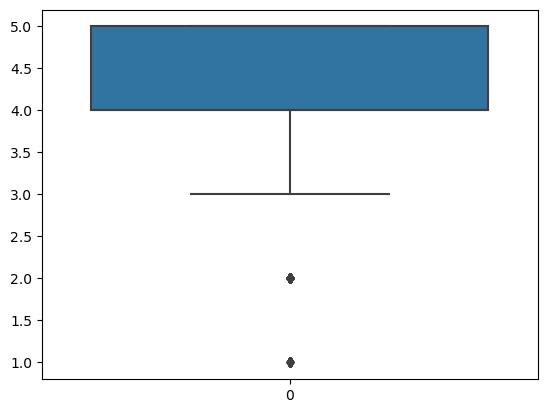

In [45]:
sns.boxplot(Alarm_Survey_df.sleep_quality);

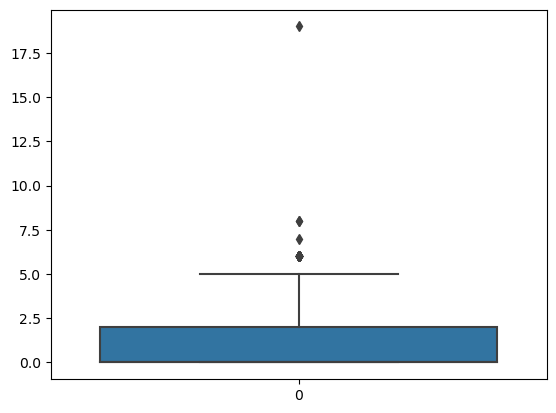

In [46]:
sns.boxplot(Alarm_Survey_df.number_of_snoozes);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


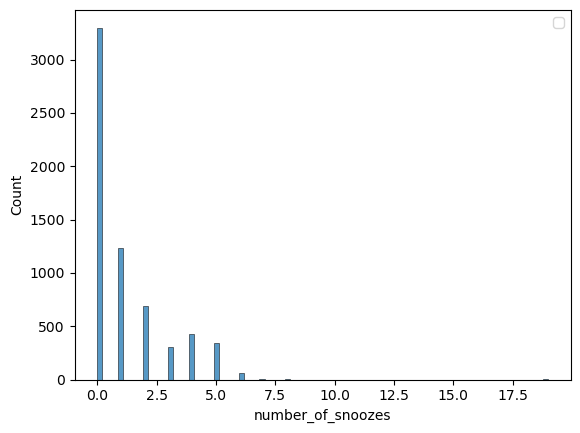

In [47]:
(sns.
 histplot(Alarm_Survey_df.number_of_snoozes)
 .legend(bbox_to_anchor = (1,1)));

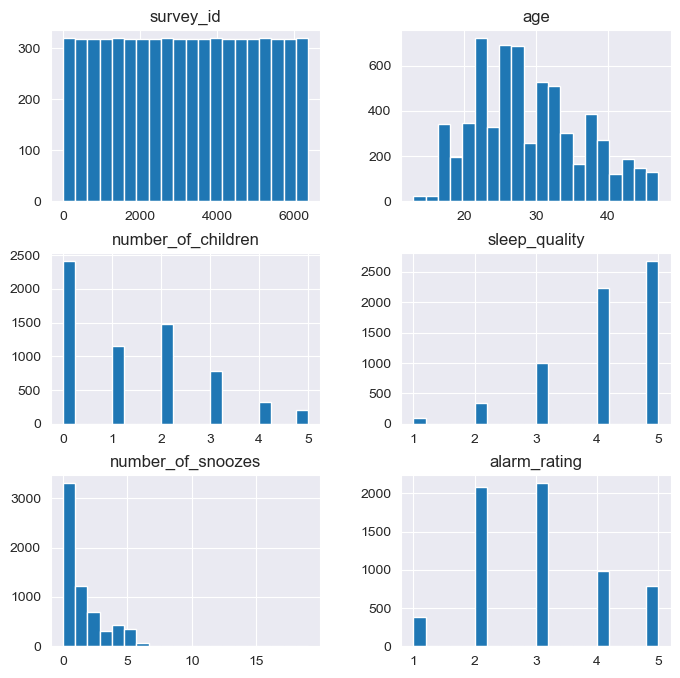

In [61]:
Alarm_Survey_df.hist(bins=20 ,figsize= (8,8));

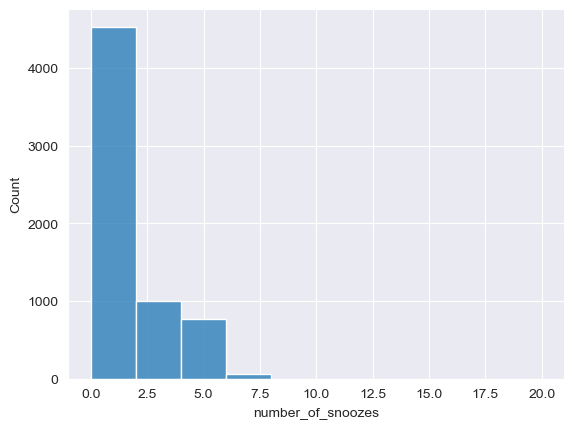

In [68]:
sns.histplot(Alarm_Survey_df.number_of_snoozes , binwidth= 2);

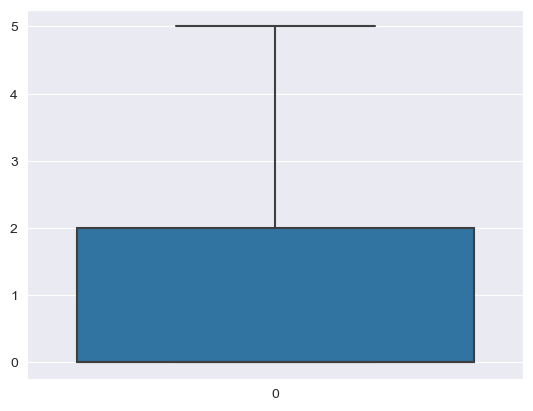

In [100]:
sns.boxplot(Alarm_Survey_df.number_of_snoozes);

In [71]:
mean = np.round(Alarm_Survey_df.number_of_snoozes.mean(),2)
std = np.round(Alarm_Survey_df.number_of_snoozes.std(),2)
mean,std

(1.16, 1.6)

In [73]:
p25,p50,p75 = np.round(np.percentile(Alarm_Survey_df.number_of_snoozes,[25,50,75]))
p25,p50,p75

(0.0, 0.0, 2.0)

In [76]:
min_value , max_value = (p25 - 1.5*std).round(2) , (p75 + 1.5*std).round(2)
min_value , max_value

(-2.4, 4.4)

In [77]:
potential_outliers = [value for value in Alarm_Survey_df.number_of_snoozes if (value > max_value) or (value< min_value)]

In [81]:
set(potential_outliers)

{5, 6, 7, 8, 19}

## Upper Outliers:

In [93]:
Alarm_Survey_df[Alarm_Survey_df.number_of_snoozes >= max_value].sort_values(['number_of_snoozes'] , ascending = False)

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
749,750,19,1,Light,5,19,3
950,951,33,2,Active,4,8,3
735,736,34,3,Active,3,8,3
1583,1584,45,4,Very active,5,7,5
1580,1581,22,1,Light,3,6,3
...,...,...,...,...,...,...,...
1783,1784,42,2,Very active,2,5,2
1782,1783,24,0,Active,5,5,3
1781,1782,31,0,Light,3,5,4
1780,1781,24,2,Light,4,5,2


## Lower Outlier:

In [90]:
Alarm_Survey_df[Alarm_Survey_df.number_of_snoozes <= min_value]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


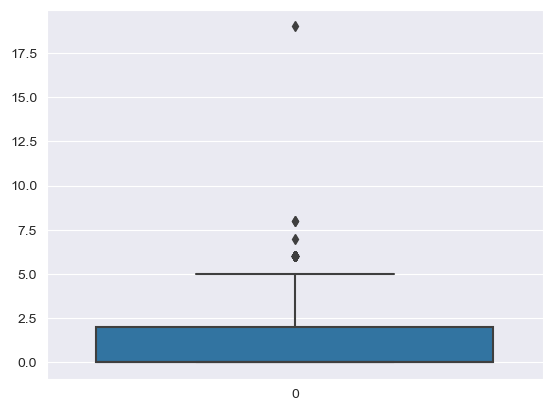

In [86]:
sns.boxplot(Alarm_Survey_df.number_of_snoozes);

## Handling Outliers:

In [98]:
Alarm_Survey_df.number_of_snoozes = np.where(Alarm_Survey_df.number_of_snoozes > max_value , 5 , Alarm_Survey_df.number_of_snoozes)

In [96]:
Alarm_Survey_df.number_of_snoozes.describe()

count    6366.000000
mean        1.157870
std         1.603528
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        19.000000
Name: number_of_snoozes, dtype: float64

In [99]:
Alarm_Survey_df.number_of_snoozes.describe()

count    6366.000000
mean        1.145146
std         1.558792
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         5.000000
Name: number_of_snoozes, dtype: float64

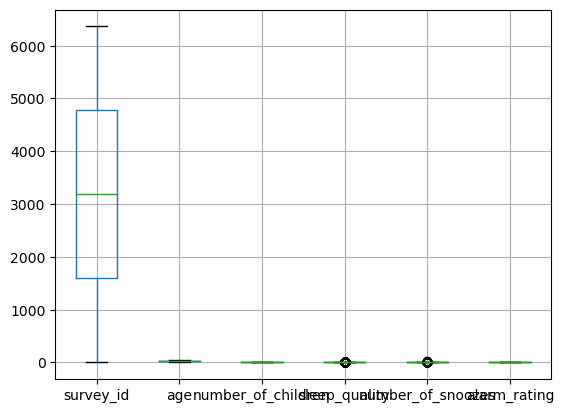

In [49]:
Alarm_Survey_df.boxplot();

In [50]:
Age_mean = np.round(Alarm_Survey_df.age.mean(),2)
Age_STD = np.round(Alarm_Survey_df.age.std(),2)

Age_Q3 = np.quantile(Alarm_Survey_df.age ,  q = 0.75  ,interpolation= 'nearest')
Age_Q1 = np.quantile(Alarm_Survey_df.age , q = 0.25 , interpolation='nearest')

print(f" Age_mean : {Age_mean} , Age_STD : {Age_STD} , Q3:{Age_Q3} , Q1: {Age_Q1}" , end = '\n')

 Age_mean : 29.08 , Age_STD : 7.48 , Q3:34 , Q1: 23


C:\Users\ahmad\AppData\Local\Temp\ipykernel_25888\2036127558.py:4: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Age_Q3 = np.quantile(Alarm_Survey_df.age ,  q = 0.75  ,interpolation= 'nearest')
C:\Users\ahmad\AppData\Local\Temp\ipykernel_25888\2036127558.py:5: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Age_Q1 = np.quantile(Alarm_Survey_df.age , q = 0.25 , interpolation='nearest')


In [51]:
Age_Outlier = np.array([ value for value in Alarm_Survey_df.age if 
               (value < Age_Q1 - 1.5 * Age_STD) or (value > Age_Q3 + 1.5 * Age_STD)])
Age_Outlier[5] = 47
Age_Outlier

array([46, 47, 47, 46, 46, 47, 46, 46, 47, 47, 46, 47, 47, 46, 46, 47, 47,
       46, 46, 47, 46, 46, 47, 47, 47, 46, 47, 47, 46, 46, 46, 47, 46, 46,
       46, 46, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 47, 46, 46, 46, 47,
       46, 47, 47, 46, 46, 46, 47, 46, 47, 47, 46, 47, 47, 47, 47, 47, 47,
       46, 47, 46, 47, 47, 46, 47, 47, 46, 46, 47, 46, 46, 46, 46, 47, 46,
       46, 46, 47, 47, 46, 47, 46, 47, 46, 47, 46, 47, 47, 46, 46, 46, 46,
       46, 46, 46, 46, 46, 47, 47, 47, 47, 46, 46, 46, 47, 46, 47, 46, 47,
       47, 46, 47, 47, 47, 46, 47, 47, 46, 47])

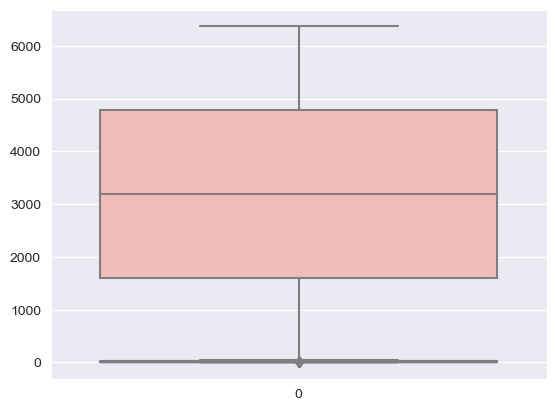

In [52]:
sns.set_style('darkgrid')
for col in list(set(Alarm_Survey_df.columns).difference(set(['activity_level']))):
    sns.boxplot(Alarm_Survey_df[col] , palette= 'Pastel1' );

In [53]:
for col in set(Alarm_Survey_df.columns).difference(set(['activity_level'])):
    print(col)

alarm_rating
number_of_snoozes
sleep_quality
age
survey_id
number_of_children


In [54]:
for col in list(set(Alarm_Survey_df.columns).difference(set(['activity_level']))):
    print(Alarm_Survey_df[col].mean().round(2))

2.96
1.16
4.11
29.08
3183.5
1.38


In [55]:
type(set(Alarm_Survey_df.columns).difference(set(['Active'])))

set

In [56]:
list(set(Alarm_Survey_df.columns).difference(set(['Active'])))

['activity_level',
 'alarm_rating',
 'number_of_snoozes',
 'sleep_quality',
 'age',
 'survey_id',
 'number_of_children']

## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [102]:
Alarm_Survey_df.isna().sum()

survey_id             0
age                   0
number_of_children    0
activity_level        0
sleep_quality         0
number_of_snoozes     0
alarm_rating          0
dtype: int64

In [104]:
Alarm_Survey_df[Alarm_Survey_df.isna().any(axis =1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


## 7. Create Columns From Numeric Data

* Read data into Python
* Check the data type of each column
* Create a numeric column using arithmetic
* Create a numeric column using conditional logic

In [57]:
# Create a “Total Spend” column that includes both the pen cost and shipping cost for each sale
# Create a “Free Shipping” column that says yes if the sale included free shipping, and no otherwise

In [105]:
pens = pd.read_excel('../Data/Pen Sales Data.xlsx')
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...


In [107]:
pens[pens.isna().any(axis =1)]

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review


In [108]:
pens.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer       25 non-null     int64         
 1   Item           25 non-null     object        
 2   Pen Cost       25 non-null     float64       
 3   Shipping Cost  25 non-null     float64       
 4   Purchase Date  25 non-null     datetime64[ns]
 5   Delivery Date  25 non-null     datetime64[ns]
 6   Review         25 non-null     object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 7.8 KB


In [121]:
pens.Item = pens.Item.astype('category')

In [122]:
pens.Item.value_counts(dropna = False)

Item
Ballpoint Pens (Bold)    5
Sharpies                 5
Ballpoint Pens           4
Gel Pens                 4
Rollerball Pens          4
Gel Pens (Pastel)        3
Name: count, dtype: int64

In [139]:
pens['Total Spend'] = pens['Pen Cost'] + pens['Shipping Cost']
pens['Free Shipping'] = np.where(pens['Shipping Cost'] == 0 , 'Free' , 'No')
pens['Free Shipping'] = pens['Free Shipping'].astype('category')

In [125]:
pens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer       25 non-null     int64         
 1   Item           25 non-null     category      
 2   Pen Cost       25 non-null     float64       
 3   Shipping Cost  25 non-null     float64       
 4   Purchase Date  25 non-null     datetime64[ns]
 5   Delivery Date  25 non-null     datetime64[ns]
 6   Review         25 non-null     object        
 7   Total Spend    25 non-null     float64       
 8   Free Shipping  25 non-null     category      
dtypes: category(2), datetime64[ns](2), float64(3), int64(1), object(1)
memory usage: 1.9+ KB


In [141]:
pens = pens.assign(Total_Spend = pens['Shipping Cost'] + pens['Pen Cost'] ,
           Free_Shipping = np.where(pens['Shipping Cost'] == 0, 'Free' , 'No')
           )
#pens.drop(columns = ['Total Spend', 'Free Shipping'], axis = 1, inplace=True)

In [142]:
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total_Spend,Free_Shipping,Total Spend,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,8.98,No
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Free,12.99,Free
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,11.94,No
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,8.98,No
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,14.98,No


In [143]:
pens.drop(columns = ['Total Spend', 'Free Shipping'], axis = 1, inplace=True)

In [144]:
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total_Spend,Free_Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Free
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No


In [138]:
#Rename a column
pens.rename(columns= lambda x : x.upper())

,CUSTOMER,ITEM,PEN COST,SHIPPING COST,PURCHASE DATE,DELIVERY DATE,REVIEW,TOTAL_SPEND,FREE_SHIPPING
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Free
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No
5,5206,Gel Pens (Pastel),14.99,1.99,2023-05-01,2023-05-04,SmoothOperatorPen|This gel pen writes smoothly...,16.98,No
6,5207,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,InkStainedFingers|This pen is prone to leaking...,14.98,No
7,5208,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-07,"BoldInkWriter|Unfortunately, this pen has a te...",14.98,No
8,5209,Gel Pens,5.99,2.99,2023-05-01,2023-05-06,PenmanshipPro|The gel pen has a comfortable gr...,8.98,No
9,5210,Gel Pens (Pastel),14.99,4.99,2023-05-01,2023-05-02,GelPenGuru|This retractable gel pen has a fine...,19.98,No


## 8. Create Columns From DateTime Data

* Calculate the difference between two datetime columns and save it as a new column
* Take the average of a column

In [58]:
# Calculate the number of days between the purchase and delivery date for each sale
# Save it as a new column called “Delivery Time”
# What were the average days from purchase to delivery?

## # of Days between the purchase & the delivery date

In [146]:
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total_Spend,Free_Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Free
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No


In [157]:
pens = pens.assign(Delivery_Time = pens['Delivery Date'] - pens['Purchase Date'])
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total_Spend,Free_Shipping,Delivery Time,Delivery_Time
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days,2 days
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Free,3 days,3 days
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days,1 days
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days,3 days
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days,2 days


In [161]:
#pens.drop(columns=['Delivery Time'], inplace = True, axis = 1)
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total_Spend,Free_Shipping,Delivery_Time
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Free,3 days
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days


In [164]:
pens.dtypes

Customer                   int64
Item                    category
Pen Cost                 float64
Shipping Cost            float64
Purchase Date     datetime64[ns]
Delivery Date     datetime64[ns]
Review                    object
Total_Spend              float64
Free_Shipping             object
Delivery_Time    timedelta64[ns]
dtype: object

### What were the average days from purchase to delivery?

In [166]:
pens['Delivery_Time'].mean()

Timedelta('3 days 05:45:36')

## 9. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [59]:
# Split the reviews on the “|” character to create two new columns: “User Name” and “Review Text”
# Create a “Leak or Spill” column that flags the reviews that mention either “leak” or “spill”

In [ ]:
pd.DataFrame(pens.Review.str.split('|').to_list()))

In [ ]:
pd.Dat

In [167]:
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total_Spend,Free_Shipping,Delivery_Time
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Free,3 days
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days


In [172]:
pens[['User_Name' , 'Review_Text']] = pd.DataFrame(pens.Review.str.split('|').to_list())

In [174]:
pens['Leak_or_Spill'] = pens.Review_Text.str.lower().str.contains('leak|spill', regex= True)

In [175]:
pens.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total_Spend,Free_Shipping,Delivery_Time,User_Name,Review_Text,Leak_or_Spill
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat...",True
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Free,3 days,ScribbleMaster,"The classic Sharpie marker has a bold, permane...",False
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1 days,PenPalForever,"The retractable ballpoint pen has a durable, m...",False
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3 days,TheWriteWay,This gel pen has a comfortable grip and writes...,False
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2 days,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an...",False


In [185]:
pens[pens.Leak_or_Spill == True].count()

Customer         8
Item             8
Pen Cost         8
Shipping Cost    8
Purchase Date    8
Delivery Date    8
Review           8
Total_Spend      8
Free_Shipping    8
Delivery_Time    8
User_Name        8
Review_Text      8
Leak_or_Spill    8
dtype: int64

In [187]:
(pens.Leak_or_Spill == True).sum()

8